In [27]:
import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM3', 9600, timeout=2)
dut.connect(ser)

In [28]:
dut.power_on()
dut.reset_chip()
dut.reset_dpe()

Setting vrefs to default


In [26]:
dut.ground_PIC()
dut.power_off()
dut.disconnect()

DAC initialized to a span from -10 V to 10 V


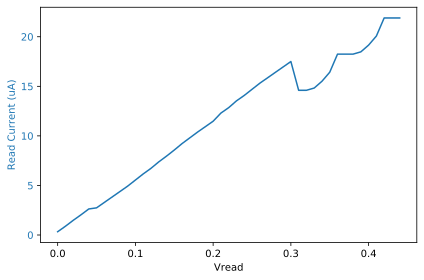

In [29]:
arr=1
rr=13
cc=9

Vreads = np.arange(0, 0.45, 0.01)
Vgate = 5
Vref = 0.5
rdCurrs = []
    
for vRead in Vreads:
    rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1))

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Vread')
ax1.set_ylabel('Read Current (uA)', color=color)
ax1.plot(Vreads, [i* 1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.show()

In [17]:
arr = 1
rr = 13
cc = 9

Vgate = 5

targetG = 30e-6
targetTolerance = 4e-6

vSetRamp = np.arange(0.4, 3.5, 0.2)
vGateSetRamp = np.arange(0.6, 1.4, 0.05)
vResetRamp = np.arange(0.3, 3.8, 0.1)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 4

initG = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead
finalG = a0.cell_program(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
if ( (finalG >= (targetG-targetTolerance)) & (finalG <= (targetG+targetTolerance)) ):
    print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))
else:
    print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))


Success! Array 1 , device (row= 13 col= 9 ) Init G= 4.354394383719896e-05  Final G= 3.147605083088954e-05 Err= 1.4760508308895403e-06


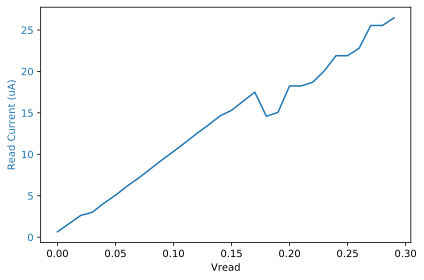

In [38]:
arr=1
rr=13
cc=9

Vreads = np.arange(0, 0.3, 0.01)
Vgate = 5
Vref = 0.5
rdCurrs = []
    
for vRead in Vreads:
    rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1))

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Vread')
ax1.set_ylabel('Read Current (uA)', color=color)
ax1.plot(Vreads, [i* 1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.show()

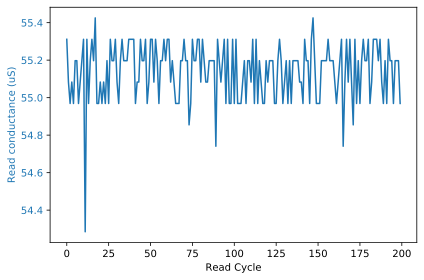

In [31]:
arr=1
rr=13
cc=9

Vgate = 5
Vref = 0.5
rdCurrs = []
numReads = 200
vRead = 0.15

for i in range(numReads):
    rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    time.sleep(0.01)

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Read Cycle')
ax1.set_ylabel('Read conductance (uS)', color=color)
ax1.plot([i* 1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.show()

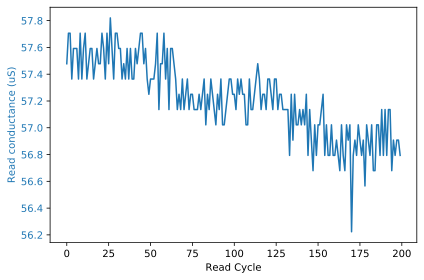

In [32]:
arr=1
rr=13
cc=9

Vgate = 5
Vref = 0.5
rdCurrs = []
numReads = 200
vRead = 0.15

for i in range(numReads):
    #rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    rdCurrs.append(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1) / vRead)
    time.sleep(0.01)

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Read Cycle')
ax1.set_ylabel('Read conductance (uS)', color=color)
ax1.plot([i* 1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.show()

In [35]:
arr = 1
rr = 13
cc = 9

Vgate = 5

targetG = 100e-6
targetTolerance = 10e-6

vSetRamp = np.arange(0.4, 3.5, 0.2)
vGateSetRamp = np.arange(0.6, 1.4, 0.05)
vResetRamp = np.arange(0.3, 3.8, 0.1)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 4

initG = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead
finalG = a0.cell_program(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
if ( (finalG >= (targetG-targetTolerance)) & (finalG <= (targetG+targetTolerance)) ):
    print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))
else:
    print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))

Success! Array 1 , device (row= 13 col= 9 ) Init G= 0.0001703052025632671  Final G= 0.00010948191593352881 Err= 9.48191593352881e-06


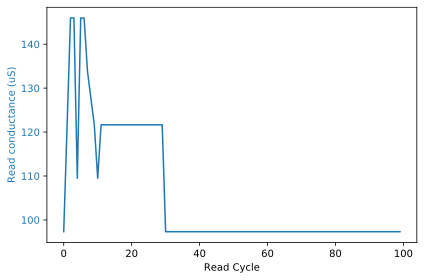

In [36]:
arr=1
rr=13
cc=9

Vgate = 5
Vref = 0.5
rdCurrs = []
numReads = 100
vRead = 0.15

for i in range(numReads):
    #rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    rdCurrs.append(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1) / vRead)
    time.sleep(0.01)

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Read Cycle')
ax1.set_ylabel('Read conductance (uS)', color=color)
ax1.plot([i* 1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.show()

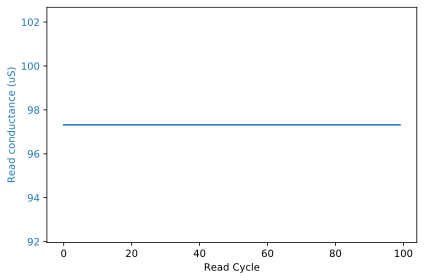

In [37]:
arr=1
rr=13
cc=9

Vgate = 5
Vref = 0.5
rdCurrs = []
numReads = 100
vRead = 0.15

for i in range(numReads):
    #rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    rdCurrs.append(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1) / vRead)
    time.sleep(0.01)

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Read Cycle')
ax1.set_ylabel('Read conductance (uS)', color=color)
ax1.plot([i* 1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.show()